テキストの目的
教師あり学習（回帰問題）の概観を知る
scikit-laernを使い回帰を行えるようにする
手法の簡単な比較をする

【問題1】練習のために特徴量の選択
データセットを読み込んだ後、説明変数GrLivAreaとYearBuilt、目的変数SalePriceをそれぞれ抜き出してください。

In [43]:
import pandas as pd
# import os
# os.listdir()
# print(os.pwd)
df = pd.read_csv('/content/drive/MyDrive/DIC/train.csv')
print(df)

        Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 81 columns]


In [44]:
# #GrLivAreaのデータフレーム作成
# GrLivArea_df= df['GrLivArea']
# print(GrLivArea_df)
# GrLivArea_df2 = df.loc[:, 'GrLivArea'].values
# print(GrLivArea_df2[:])

# #YearBuiltのデータフレーム作成
# YearBuilt_df= df['YearBuilt']
# print(YearBuilt_df)
# # YearBuilt_df2 = df.loc[:, 'YearBuilt'].values
# YearBuilt_df2 = df.loc[:, 'YearBuilt']
# print(YearBuilt_df2[:])
# print(type(YearBuilt_df2))
#df = df.random.sample(300)#サンプル数を３００へ絞り込み
x=df.loc[:,['GrLivArea','YearBuilt']]
print(type(x))
print(x)


#df.index[df['TARGET']==0]
#SalePriceのデータフレーム作成
# SalePrice_df= df.loc[:, 'SalePrice']
# # SalePrice_df= df.index[df['SalePrice']]
# print(SalePrice_df)
# target = df.loc[:, 'SalePrice'].values
target = df.loc[:, ['SalePrice']]
print(target[:])
print(type(target))

<class 'pandas.core.frame.DataFrame'>
      GrLivArea  YearBuilt
0          1710       2003
1          1262       1976
2          1786       2001
3          1717       1915
4          2198       2000
...         ...        ...
1455       1647       1999
1456       2073       1978
1457       2340       1941
1458       1078       1950
1459       1256       1965

[1460 rows x 2 columns]
      SalePrice
0        208500
1        181500
2        223500
3        140000
4        250000
...         ...
1455     175000
1456     210000
1457     266500
1458     142125
1459     147500

[1460 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。


sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation


評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。


sklearn.metrics.mean_squared_error — scikit-learn 0.21.3 documentation


可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。
scatterを用いて、実際のデータと予測結果を比較できるグラフを作りましょう。

MAE = 62517.22,  RMSE = 89218.77,  score = -0.01
Coef =  [[-3382.7352758  -2854.34436955]]
Intercept = [175739.89678414]


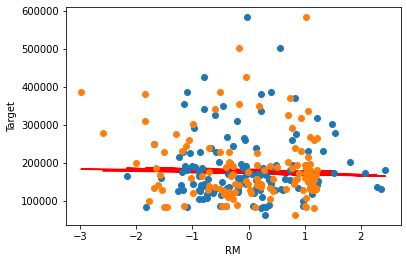

In [45]:
# import numpy as np
# from sklearn.linear_model import LinearRegression
# X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# # y = 1 * x_0 + 2 * x_1 + 3
# y = np.dot(X, np.array([1, 2])) + 3
# reg = LinearRegression().fit(X, y)
# reg.score(X, y)
#1.0
#>>> reg.coef_
#array([1., 2.])
#>>> reg.intercept_
#3.0...
#>>> reg.predict(np.array([[3, 5]]))
#array([16.])


%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import itertools


########################
# 線形回帰（最小二乗法）
########################
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import random

X=x
#print(df.sample(n=3))
X = X.sample(n=500)#サンプル数を5００へ絞り込み
X=X.values

X=X.tolist()
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

# 目的変数
# Y = boston.target
Y = target
Y = Y.sample(n=500)#サンプル数を5００へ絞り込み
Y=Y.values
# Y=list(itertools.chain.from_iterable(Y))
# print(Y)

# トレーニング・テストデータ分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size= 0.75, test_size=0.25)

# LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

# 予測　
Y_pred = lr.predict(X_test)

#
# 評価
#
# 平均絶対誤差(MAE)
mae = mean_absolute_error(Y_test, Y_pred)
# 平方根平均二乗誤差（RMSE）
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))  
# スコア
score = lr.score(X_test, Y_test)

print("MAE = %.2f,  RMSE = %.2f,  score = %.2f" % (mae, rmse, score))
print("Coef = ", lr.coef_)
print("Intercept =", lr.intercept_)


plt.xlabel("RM")
plt.ylabel("Target")
plt.plot(X_test, Y_pred, "r-")
plt.plot(X_test, Y_test, "o")

【問題3】手法の比較
以下のすべての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。


線形回帰
SVM
決定木
ランダムフォレスト

公式ドキュメントへのリンクは以下です。本来はパラメータチューニングを行いますが、まずはデフォルトの値で実行しましょう。


sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation
sklearn.svm.SVR — scikit-learn 0.21.3 documentation
sklearn.tree.DecisionTreeRegressor — scikit-learn 0.21.3 documentation
sklearn.ensemble.RandomForestRegressor — scikit-learn 0.21.3 documentation

SVM、決定木、ランダムフォレストは分類問題でも使用した手法ですが、回帰問題用のライブラリはそれぞれ専用のものに分かれています。

MAE = 58722.50,  RMSE = 78070.18,  score = 0.00
Coef =  [[-6904.06680837 -1600.75025816]]
Intercept = [186982.80779876]


MAE2 = 56358.89,  RMSE2 = 78549.04,  score2 = -0.01
MAE3 = 79783.03,  RMSE3 = 116763.89,  score3 = -0.01


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


MAE4 = 58948.63,  RMSE4 = 79253.40,  score4 = -0.03


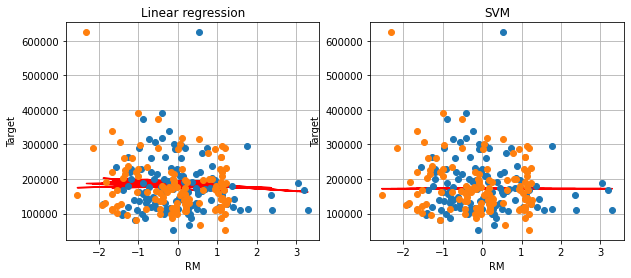

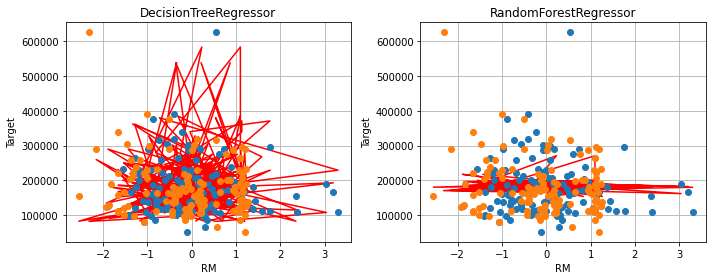

In [49]:
X=x
#print(df.sample(n=3))
random.seed(0)
X = X.sample(n=500)#サンプル数を5００へ絞り込み
X=X.values

X=X.tolist()
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
# print(X)

Y = target
random.seed(0)
Y = Y.sample(n=500)#サンプル数を5００へ絞り込み
Y=Y.values
# print(Y)

# トレーニング・テストデータ分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size= 0.75, test_size=0.25)

#線形回帰
import numpy as np
from sklearn.linear_model import LinearRegression

from sklearn.metrics import classification_report
import pandas as pd
import pprint


%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# # y = 1 * x_0 + 2 * x_1 + 3
# Y = np.dot(X, np.array([1, 2])) + 3
# reg = LinearRegression().fit(X, y)
# reg.score(X, y)
# # 1.0
# reg.coef_
# # array([1., 2.])
# reg.intercept_
# # 3.0...
# reg.predict(np.array([[3, 5]]))
# # array([16.])

# X=x
# #print(df.sample(n=3))
# random.seed(0)
# X = X.sample(n=500)#サンプル数を5００へ絞り込み
# X=X.values

# X=X.tolist()
# scaler = StandardScaler()
# scaler.fit(X)
# X=scaler.transform(X)
# print(X)

# 目的変数
# Y = boston.target
# Y = target
# random.seed(0)
# Y = Y.sample(n=500)#サンプル数を5００へ絞り込み
# Y=Y.values
# print(Y)

# # トレーニング・テストデータ分割
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size= 0.75, test_size=0.25)

# LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

# 予測　
Y_pred = lr.predict(X_test)

#
# 評価
#
# 平均絶対誤差(MAE)
mae = mean_absolute_error(Y_test, Y_pred)
# 平方根平均二乗誤差（RMSE）
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))  
# スコア
score = lr.score(X_test, Y_test)

print("MAE = %.2f,  RMSE = %.2f,  score = %.2f" % (mae, rmse, score))
print("Coef = ", lr.coef_)
print("Intercept =", lr.intercept_)

# plt.xlabel("RM")
# plt.ylabel("Target")
# plt.plot(X_test, Y_pred, "r-")
# plt.plot(X_test, Y_test, "o")

#fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(10,4))
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
s='\n'
print(s)
fig, (ax3, ax4) = plt.subplots(ncols=2, figsize=(10,4))


ax1.plot(X_test, Y_pred,  "r-")
ax1.plot(X_test, Y_test,  "o")
# ax1.plt.xlabel("RM")
# ax1.plt.ylabel("Target")
# ax1.plt.plot(X_test, Y_pred, "r-")
# ax1.plt.plot(X_test, Y_test, "o")
ax1.set_title('Linear regression')
ax1.set_xlabel('RM')
ax1.set_ylabel('Target')
# axL.set_xlim(-np.pi, np.pi)
ax1.grid(True)

#SVM
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
n_samples, n_features = 10, 5
#rng = np.random.RandomState(0)

# X=x
# #print(df.sample(n=3))
# random.seed(0)
# X = X.sample(n=500)#サンプル数を5００へ絞り込み
# X=X.values

# X=X.tolist()
# scaler = StandardScaler()
# scaler.fit(X)
# X=scaler.transform(X)
# print(X)

# # 目的変数
# # Y = boston.target
# Y = target
# random.seed(0)
# Y = Y.sample(n=500)#サンプル数を5００へ絞り込み
# Y=Y.values
# print(Y)

# # トレーニング・テストデータ分割
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size= 0.75, test_size=0.25)


# y = rng.randn(n_samples)
# X = rng.randn(n_samples, n_features)
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, Y_train)
#Pipeline(steps=[('standardscaler', StandardScaler()),('svr', SVR(epsilon=0.2))])

# 予測　
Y_pred2 = regr.predict(X_test)

#
# 評価
#
# 平均絶対誤差(MAE)
mae2 = mean_absolute_error(Y_test, Y_pred2)
# 平方根平均二乗誤差（RMSE）
rmse2 = np.sqrt(mean_squared_error(Y_test, Y_pred2))  
# スコア
score2 = regr.score(X_test, Y_test)

print("MAE2 = %.2f,  RMSE2 = %.2f,  score2 = %.2f" % (mae2, rmse2, score2))
# print("Coef2 = ", regr.coef_)
# print("Intercept2 =", regr.intercept_)

ax2.plot(X_test, Y_pred2,  "r-")
ax2.plot(X_test, Y_test,  "o")
ax2.set_title('SVM')
ax2.set_xlabel('RM')
ax2.set_ylabel('Target')
# axL.set_xlim(-np.pi, np.pi)
ax2.grid(True)


#決定木
from sklearn import tree
# X = [[0, 0], [2, 2]]
# y = [0.5, 2.5]

# X=x
# #print(df.sample(n=3))
# random.seed(0)
# X = X.sample(n=500)#サンプル数を5００へ絞り込み
# X=X.values

# X=X.tolist()
# scaler = StandardScaler()
# scaler.fit(X)
# X=scaler.transform(X)
# print(X)

# # 目的変数
# # Y = boston.target
# Y = target
# random.seed(0)
# Y = Y.sample(n=500)#サンプル数を5００へ絞り込み
# Y=Y.values
# print(Y)

# # トレーニング・テストデータ分割
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size= 0.75, test_size=0.25)


clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, Y_train)
# clf.predict([[1, 1]])


# 予測　
Y_pred3 = clf.predict(X_test)
# array([0.5])

# 評価
#
# 平均絶対誤差(MAE)
mae3 = mean_absolute_error(Y_test, Y_pred3)
# 平方根平均二乗誤差（RMSE）
rmse3 = np.sqrt(mean_squared_error(Y_test, Y_pred3))  
# スコア
score3 = regr.score(X_test, Y_test)

print("MAE3 = %.2f,  RMSE3 = %.2f,  score3 = %.2f" % (mae3, rmse3, score3))
# print("Coef2 = ", regr.coef_)
# print("Intercept2 =", regr.intercept_)

ax3.plot(X_test, Y_pred3,  "r-")
ax3.plot(X_test, Y_test,  "o")
ax3.set_title('DecisionTreeRegressor')
ax3.set_xlabel('RM')
ax3.set_ylabel('Target')
# axL.set_xlim(-np.pi, np.pi)
ax3.grid(True)


#ランダムフォレスト
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# X=x
# #print(df.sample(n=3))
# random.seed(0)
# X = X.sample(n=500)#サンプル数を5００へ絞り込み
# X=X.values

# X=X.tolist()
# scaler = StandardScaler()
# scaler.fit(X)
# X=scaler.transform(X)
# print(X)

# # 目的変数
# # Y = boston.target
# Y = target
# random.seed(0)
# Y = Y.sample(n=500)#サンプル数を5００へ絞り込み
# Y=Y.values
# print(Y)

# # トレーニング・テストデータ分割
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size= 0.75, test_size=0.25)

#X, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, Y_train)
RandomForestRegressor(...) #これは何故書くのか？
# print(regr.predict([[0, 0, 0, 0]]))
#[-8.32987858]

# 予測　
Y_pred4 = regr.predict(X_test)
# array([0.5])

# 評価
#
# 平均絶対誤差(MAE)
mae4 = mean_absolute_error(Y_test, Y_pred4)
# 平方根平均二乗誤差（RMSE）
rmse4 = np.sqrt(mean_squared_error(Y_test, Y_pred4))  
# スコア
score4 = regr.score(X_test, Y_test)

print("MAE4 = %.2f,  RMSE4 = %.2f,  score4 = %.2f" % (mae4, rmse4, score4))
# print("Coef2 = ", regr.coef_)
# print("Intercept2 =", regr.intercept_)

ax4.plot(X_test, Y_pred4,  "r-")
ax4.plot(X_test, Y_test,  "o")
ax4.set_title('RandomForestRegressor')
ax4.set_xlabel('RM')
ax4.set_ylabel('Target')
# axL.set_xlim(-np.pi, np.pi)
ax4.grid(True)


plt.tight_layout()       # Axes同士の重なりを自動調整

'''どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。'''

指標値MAEとRMSEは、線形回帰,SVM,ランダムフォレストは殆ど同じである。決定木は、値が大きく悪かった。
scoreは、どれも目標変数の赤い線に対して、散布図からの離れ方は同様なので、数値は、低かった。
グラフから読み取れる事は、線形回帰,SVM,ランダムフォレストは、目標変数の赤い線が大体２０万ドルで近かった。
決定木だけは、グラフの目標変数の赤い線が一貫性が　無い線であった。





【問題4】（アドバンス課題）他の特徴量も使用しての学習
ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。どう選択・加工するかにはデータ分析が重要になってきます。


KaggleのNotebooksも参考にできます。


House Prices: Advanced Regression Techniques | Kaggle

In [47]:
#省略